In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [51]:
delivery_data=pd.read_csv('deliveries.csv')
per_match=pd.read_csv('matches.csv')

In [52]:
delivery_data.fillna('0',inplace=True)

In [53]:
delivery_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,0,0,0
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
per_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [6]:
delivery_data.columns

Index([u'match_id', u'inning', u'batting_team', u'bowling_team', u'over',
       u'ball', u'batsman', u'non_striker', u'bowler', u'is_super_over',
       u'wide_runs', u'bye_runs', u'legbye_runs', u'noball_runs',
       u'penalty_runs', u'batsman_runs', u'extra_runs', u'total_runs',
       u'player_dismissed', u'dismissal_kind', u'fielder'],
      dtype='object')

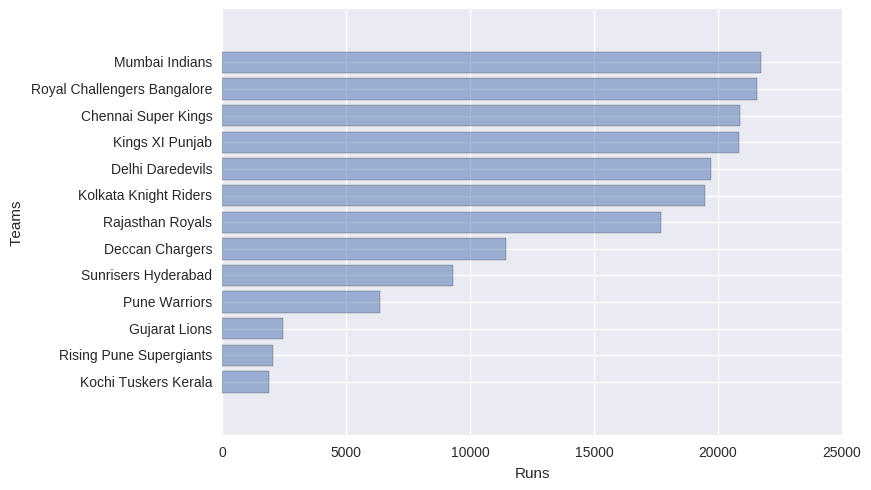

In [7]:
#Total runs by Teams in all seasons
team_runs={}
for team in np.unique(delivery_data['batting_team']):
    team_runs[team]=delivery_data[delivery_data['batting_team']==team]['total_runs'].sum()

team_runs=sorted(team_runs.items(),key=lambda x:x[1])    
pos=np.arange(len(team_runs))
plt.barh(pos,[i[1] for i in team_runs],align='center',alpha=0.5)
plt.yticks(pos,[i[0] for i in team_runs])
plt.xlabel('Runs')
plt.ylabel('Teams')
plt.show()

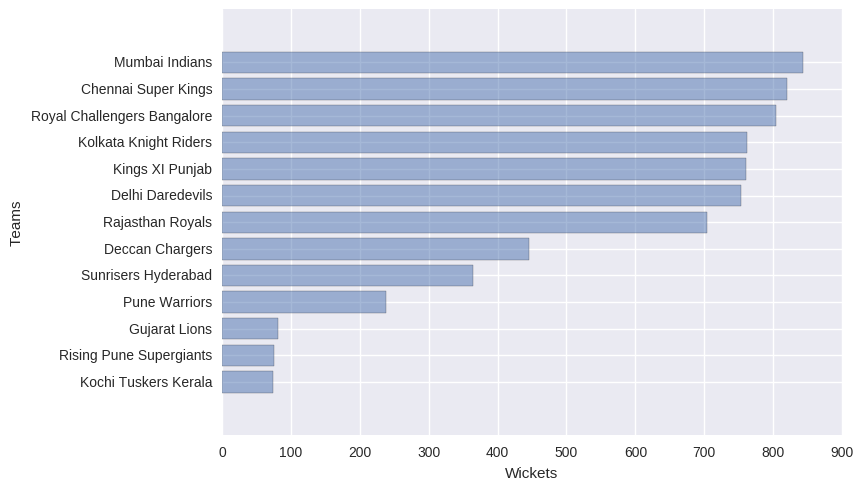

In [8]:
#Total wickets in all seasons

wicket_data=delivery_data[delivery_data['player_dismissed']!='0']
team_wickets={}
for team in np.unique(wicket_data['bowling_team']):
        team_wickets[team]=wicket_data[wicket_data['bowling_team']==team].shape[0]
  
team_wickets=sorted(team_wickets.items(),key=lambda x:x[1])    
pos=np.arange(len(team_wickets))
plt.barh(pos,[i[1] for i in team_wickets],align='center',alpha=0.5)
plt.yticks(pos,[i[0] for i in team_wickets])
plt.xlabel('Wickets')
plt.ylabel('Teams')
plt.show()

In [9]:
# Top 10 wicket takers 
bowler_wickets={}
for bowl in np.unique(wicket_data['bowler']):
        bowler_wickets[bowl]=wicket_data[wicket_data['bowler']==bowl].shape[0]
        
bowler_wickets=sorted(bowler_wickets.items(),key=lambda x: x[1])
bowler_wickets[len(bowler_wickets):len(bowler_wickets)-11:-1]

[('SL Malinga', 159),
 ('DJ Bravo', 137),
 ('A Mishra', 132),
 ('Harbhajan Singh', 128),
 ('PP Chawla', 127),
 ('R Vinay Kumar', 123),
 ('A Nehra', 111),
 ('R Ashwin', 110),
 ('Z Khan', 107),
 ('DW Steyn', 100)]

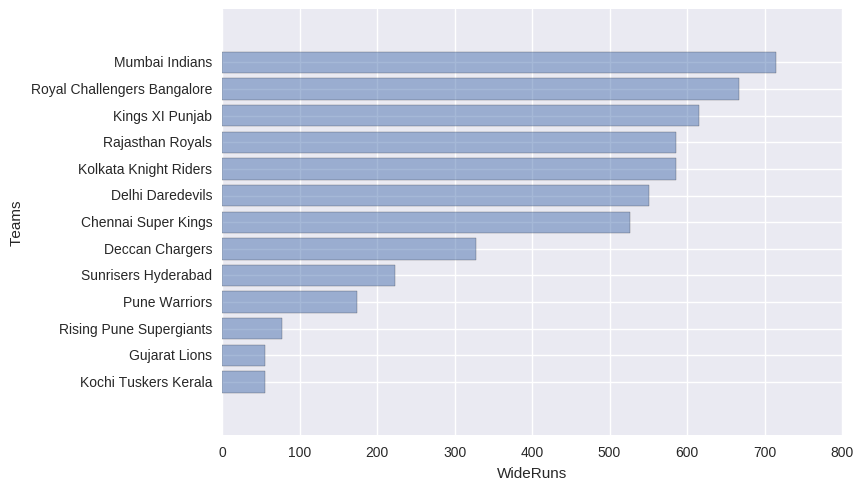

In [10]:
#Total wideRuns by Teams in all seasons
team_wides={}
for team in np.unique(delivery_data['bowling_team']):
    team_wides[team]=delivery_data[delivery_data['bowling_team']==team]['wide_runs'].sum()

team_wides=sorted(team_wides.items(),key=lambda x:x[1])    
pos=np.arange(len(team_wides))
plt.barh(pos,[i[1] for i in team_wides],align='center',alpha=0.5)
plt.yticks(pos,[i[0] for i in team_wides])
plt.xlabel('WideRuns')
plt.ylabel('Teams')
plt.show()

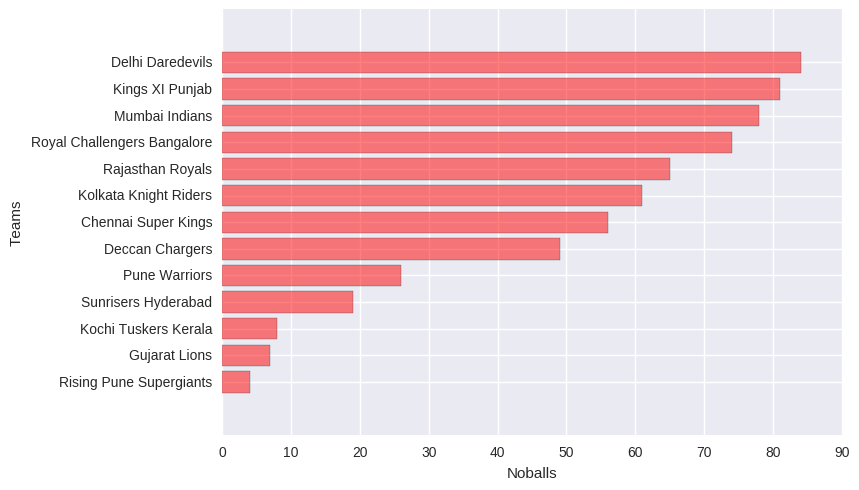

In [11]:
#Total noBalls by Teams in all seasons
team_noballs={}
for team in np.unique(delivery_data['bowling_team']):
    team_noballs[team]=delivery_data[delivery_data['bowling_team']==team]['noball_runs'].sum()

team_noballs=sorted(team_noballs.items(),key=lambda x:x[1])    
pos=np.arange(len(team_noballs))
plt.barh(pos,[i[1] for i in team_noballs],align='center',alpha=0.5,color='red')
plt.yticks(pos,[i[0] for i in team_noballs])
plt.xlabel('Noballs')
plt.ylabel('Teams')
plt.show()

In [12]:
#Top 10 noBalls in all seasons
noball_runs=delivery_data.groupby('bowler')['noball_runs'].sum()
noball_runs.sort()
print noball_runs[len(noball_runs):len(noball_runs)-11:-1]

bowler
S Sreesanth    27
I Sharma       20
A Mishra       20
JA Morkel      18
UT Yadav       16
SL Malinga     16
AB Dinda       14
SW Tait        14
M Morkel       13
B Lee          13
Name: noball_runs, dtype: int64


/home/codeML/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


In [13]:
# Top 10 bowling figures
best_figures={}
for match in np.unique(delivery_data['match_id']):
    match_data=delivery_data[delivery_data['match_id']==match]
    for bowler in np.unique(match_data['bowler']):
       
        bowler_data=match_data[match_data['bowler']==bowler]
        match_figures=(bowler_data[(bowler_data['player_dismissed']!='0') & (bowler_data['dismissal_kind']!='run out')].shape[0],bowler_data['total_runs'].sum())
        if bowler not in best_figures:
            best_figures[bowler]=match_figures
        else:
            if best_figures[bowler][0]<match_figures[0]:
                best_figures[bowler]=match_figures
            elif best_figures[bowler][0]==match_figures[0] and best_figures[bowler][1]<match_figures[1]:
                best_figures[bowler]=match_figures

In [14]:
for i in range(10):
    name=None
    wickets=0
    runs=1000
    for key in best_figures:
        if best_figures[key][0]>wickets or (best_figures[key][0]==wickets and best_figures[key][1]<runs):
            name=key
            wickets=best_figures[key][0]
            runs=best_figures[key][1]
    del best_figures[name]        
    print name,wickets,runs

Sohail Tanvir 6 15
A Zampa 6 19
A Kumble 5 6
SL Malinga 5 13
I Sharma 5 13
RA Jadeja 5 16
A Mishra 5 17
Harbhajan Singh 5 18
SP Narine 5 20
JP Faulkner 5 20


In [15]:
#Top 10 catches taker in all seasons
catch_data=delivery_data[delivery_data['dismissal_kind']=='caught']
catch_player={}
for fielder in np.unique(catch_data['fielder']):
    catch_player[fielder]=catch_data[catch_data['fielder']==fielder].shape[0]
    
for i in range(10):
    name=None
    catches=0
    for i in catch_player:
        if catches<catch_player[i]:
            name=i
            catches=catch_player[i]
    del catch_player[name]        
    print name,catches        

KD Karthik 80
SK Raina 79
AB de Villiers 75
RV Uthappa 66
MS Dhoni 66
RG Sharma 60
NV Ojha 59
V Kohli 55
PA Patel 54
DJ Bravo 52


/home/codeML/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


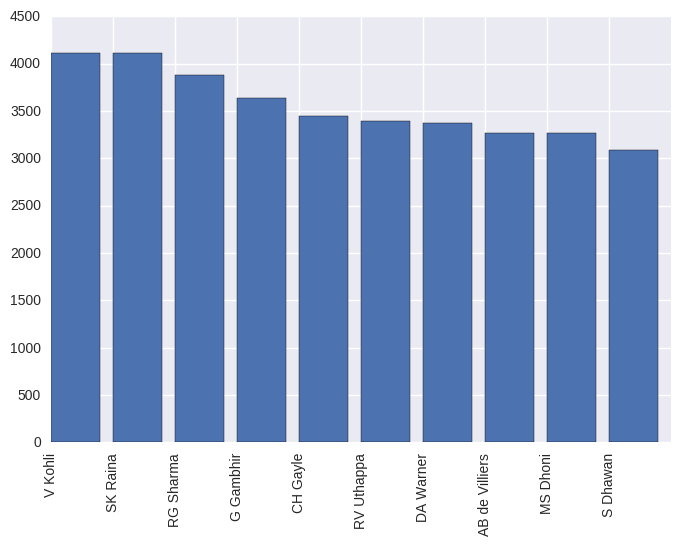

In [16]:
#Top 10 run scorer in all seasons
batsman_runs=delivery_data.groupby('batsman')['batsman_runs'].sum()
batsman_runs.sort()
batsman_runs= batsman_runs[len(batsman_runs):len(batsman_runs)-11:-1]
plt.bar(np.arange(0,10,1),[batsman_runs[i] for i in range(0,10)])
plt.xticks(np.arange(0,10,1),[i for i in batsman_runs.index],rotation='vertical')
plt.show()

In [17]:
#top 10 boundries scores
boundry=delivery_data[delivery_data['batsman_runs']==4]
boundry_player={}
for player in np.unique(boundry['batsman']):
    boundry_player[player]=boundry[boundry['batsman']==player].shape[0]
    
for i in range(10):
    name=None
    boundries=0
    for i in boundry_player:
        if boundries<boundry_player[i]:
            name=i
            boundries=boundry_player[i]
    del boundry_player[name]        
    print name,boundries        

G Gambhir 422
V Kohli 361
SK Raina 360
S Dhawan 348
RV Uthappa 341
DA Warner 338
V Sehwag 334
RG Sharma 323
SR Tendulkar 296
AM Rahane 285


In [18]:
#top 10 Sises by players
boundry=delivery_data[delivery_data['batsman_runs']==6]
boundry_player={}
for player in np.unique(boundry['batsman']):
    boundry_player[player]=boundry[boundry['batsman']==player].shape[0]
    
for i in range(10):
    name=None
    boundries=0
    for i in boundry_player:
        if boundries<boundry_player[i]:
            name=i
            boundries=boundry_player[i]
    del boundry_player[name]        
    print name,boundries        

CH Gayle 252
RG Sharma 164
SK Raina 161
V Kohli 149
YK Pathan 143
AB de Villiers 142
MS Dhoni 140
DA Warner 134
Yuvraj Singh 133
KA Pollard 125


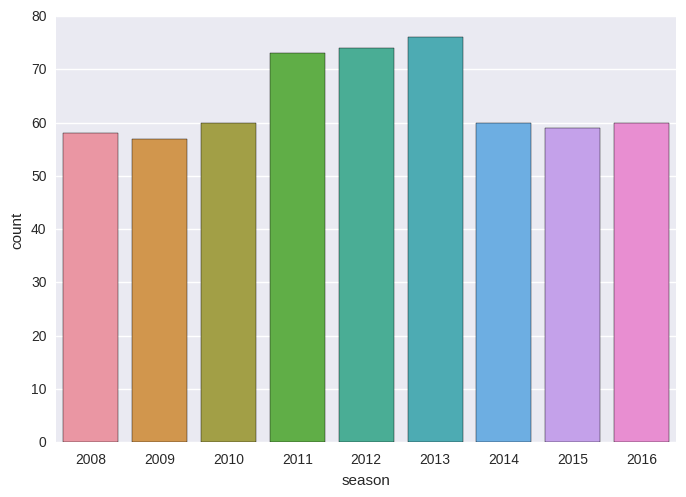

In [19]:
#Matches played per season
sns.countplot(x='season',data=per_match)
plt.show()

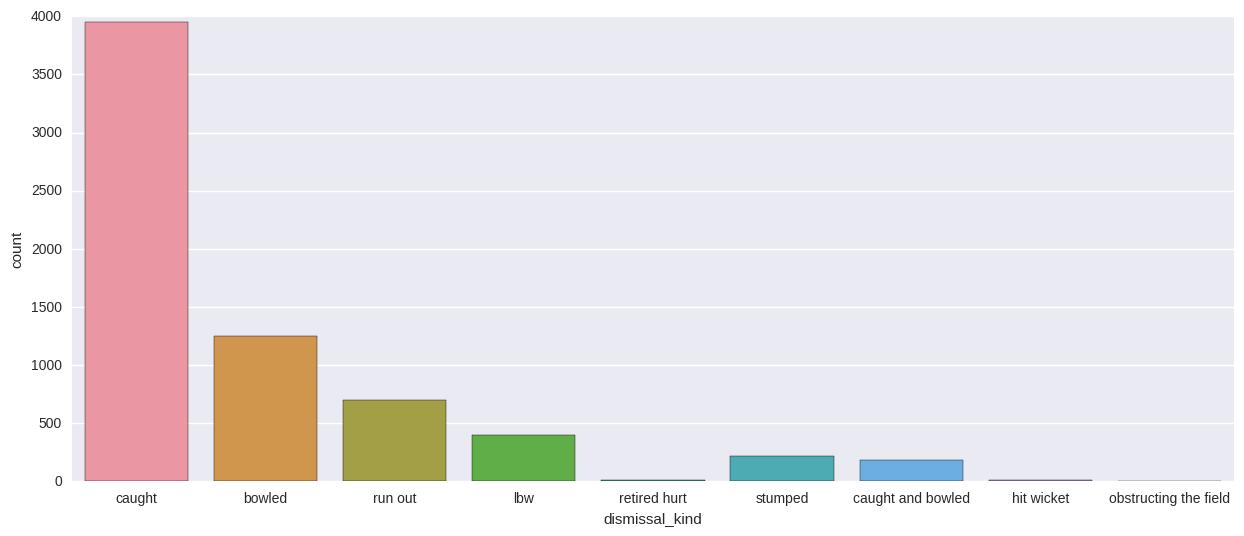

In [20]:
#type of dimissals
plt.figure(figsize=(15,6))
sns.countplot(x='dismissal_kind',data=delivery_data[delivery_data['dismissal_kind']!='0'])
plt.show()

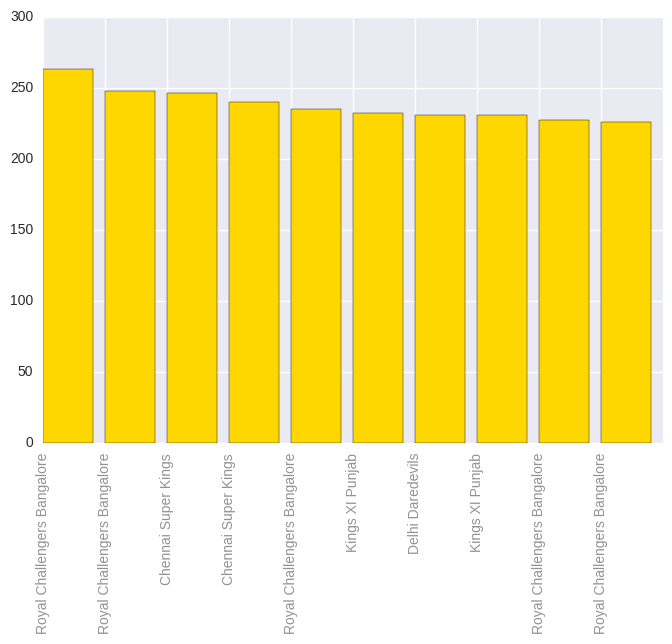

In [79]:
temp_data={}
for team in np.unique(delivery_data['batting_team']):
    team_data=delivery_data[delivery_data['batting_team']==team].groupby(['match_id','inning'])['total_runs'].sum()
    temp_data[team]=[i for i in team_data]
    temp_data[team].sort(reverse=True)
teams=[]
runs=[]
for i in range(10):
    teamm=None
    runns=0
    for j in temp_data:
        if temp_data[j][0]>runns:
            runns=temp_data[j][0]
            teamm=j
    del temp_data[teamm][0]
    teams.append(teamm)
    runs.append(runns)
plt.bar(np.arange(0,10,1),runs,color='gold')
plt.xticks(np.arange(0,10,1),teams,rotation='vertical',alpha=0.5)
plt.show()

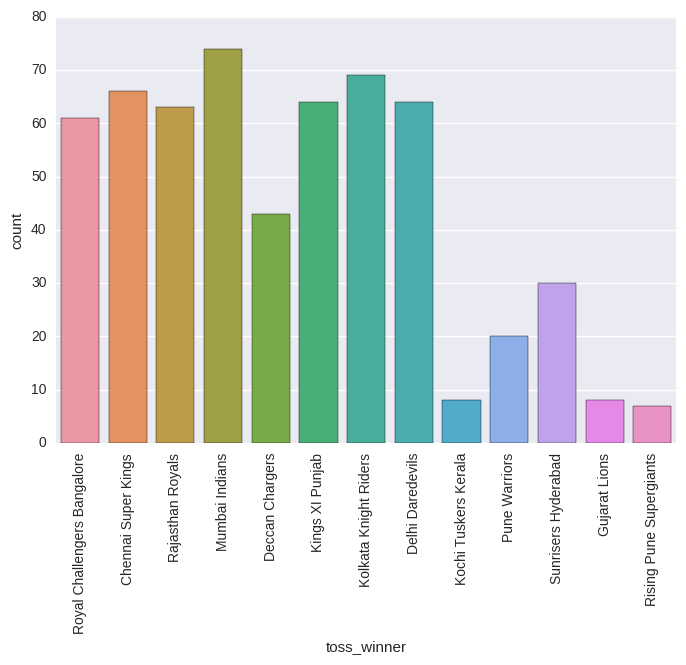

In [22]:
#Toss winners
sns.countplot(x='toss_winner',orient='V',data=per_match)
plt.xticks(rotation='vertical')
plt.show()

In [23]:
delivery_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,0,0,0
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,0,0,0
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,0,0,0


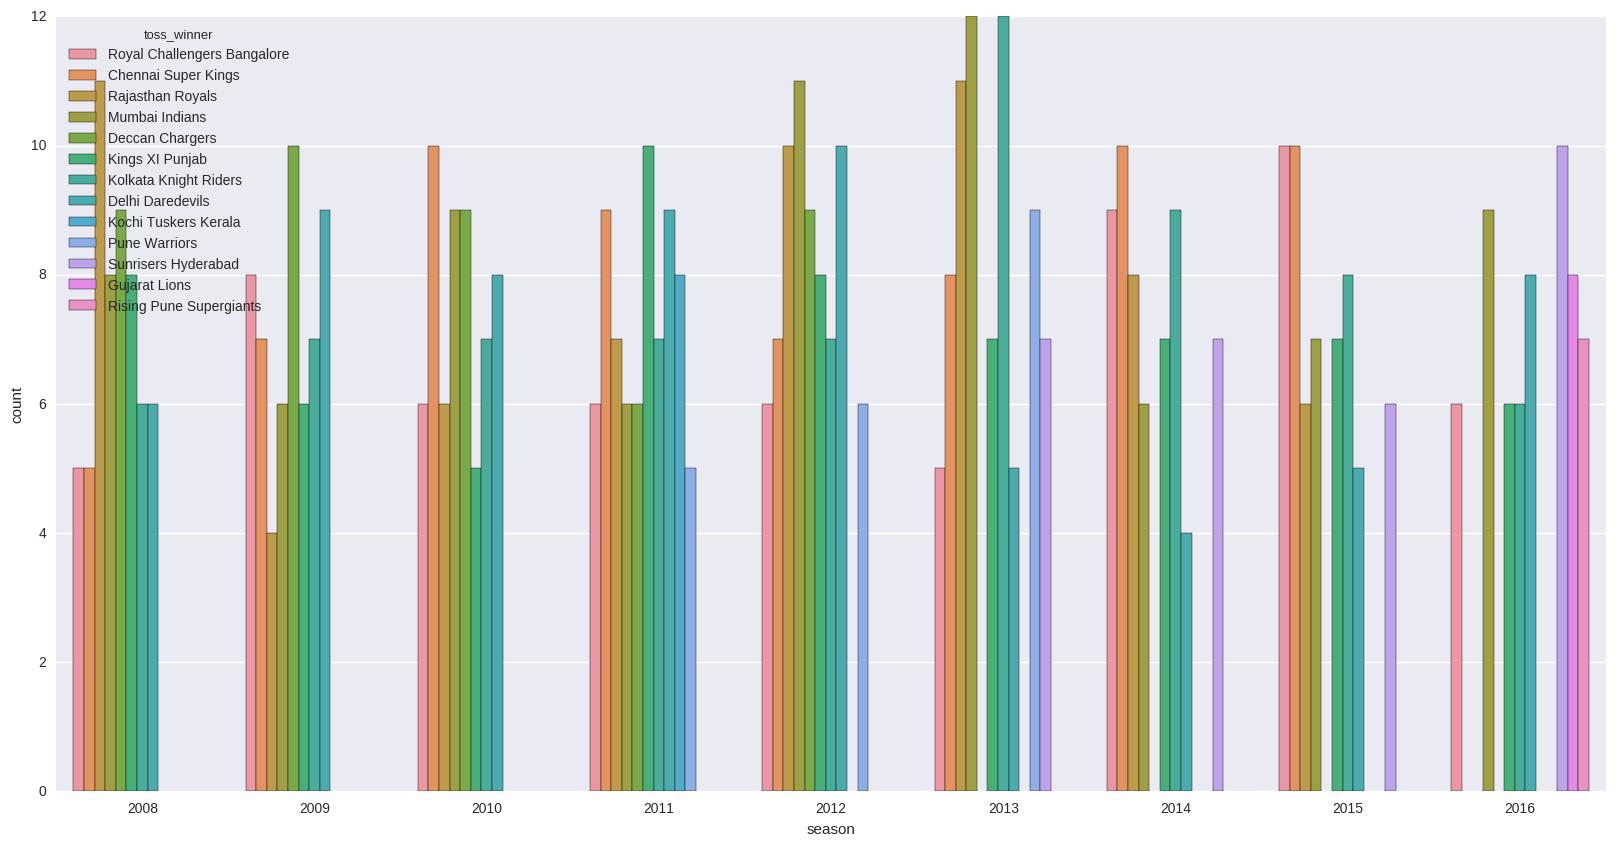

In [24]:
#Toss wins by each tear per season
plt.figure(figsize=(20,10))
sns.countplot(x='season',hue='toss_winner',data=per_match)
plt.show()

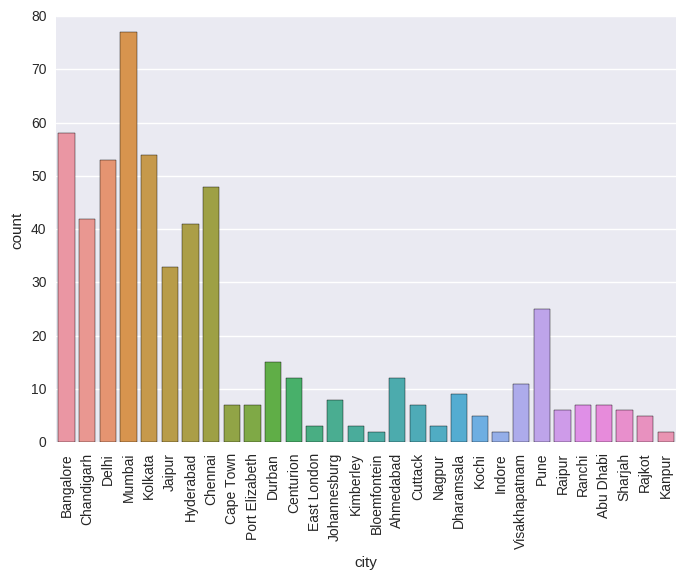

In [25]:
#Matches in different cities of india and Mumbai hosted most of the matches
sns.countplot(x='city',data=per_match)
plt.xticks(rotation='vertical')
plt.show()

[]

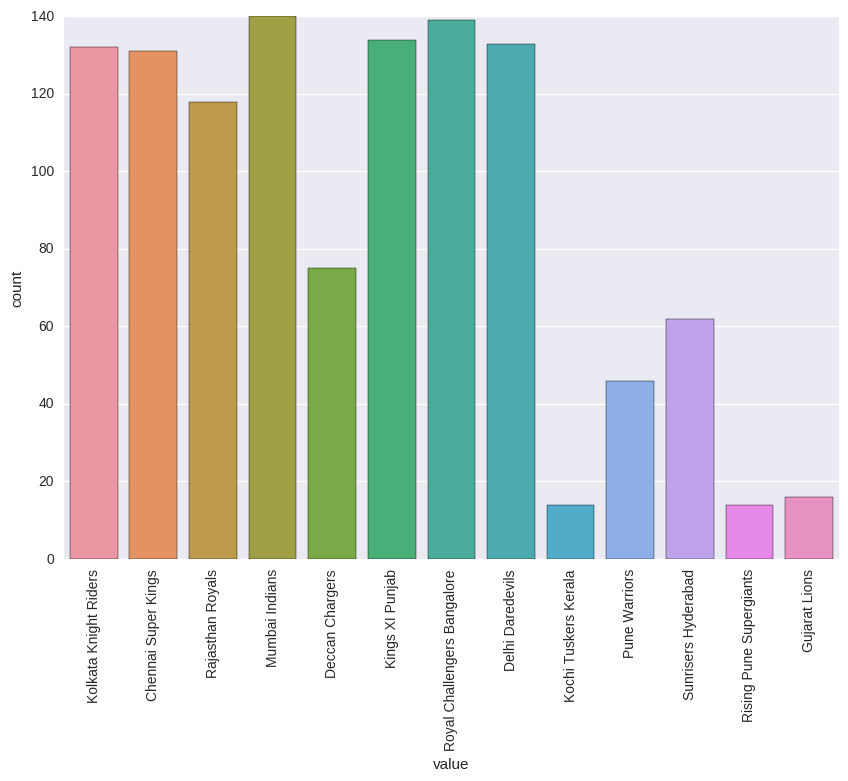

In [26]:
#number of Mactch Played by each time again mumbai indians wins
temp_data=pd.melt(per_match,id_vars=['id','season'],value_vars=['team1', 'team2'])

plt.figure(figsize=(10,7))
sns.countplot(x='value',data=temp_data)
plt.xticks(rotation='vertical')
plt.plot()

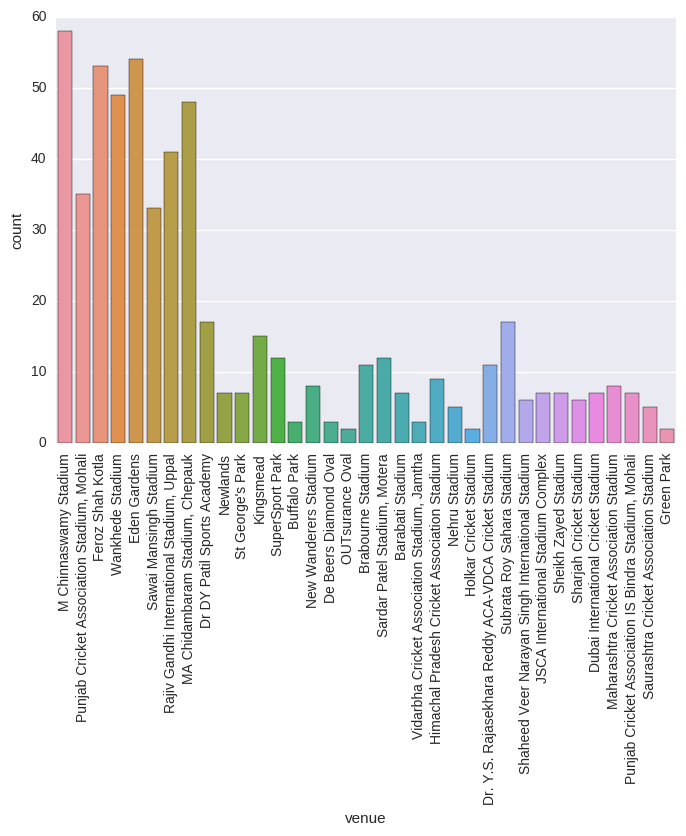

In [27]:
#Matches on different grounds
sns.countplot(x='venue',data=per_match)
plt.xticks(rotation='vertical')
plt.show()

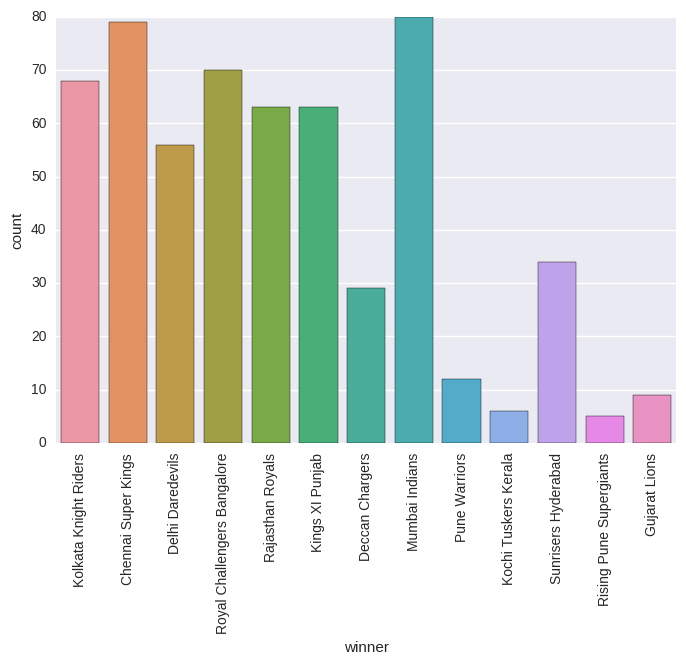

In [28]:
#Winners
sns.countplot(x='winner',data=per_match)
plt.xticks(rotation='vertical')
plt.show()

In [29]:
temp_data=per_match.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)

temp_data

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad


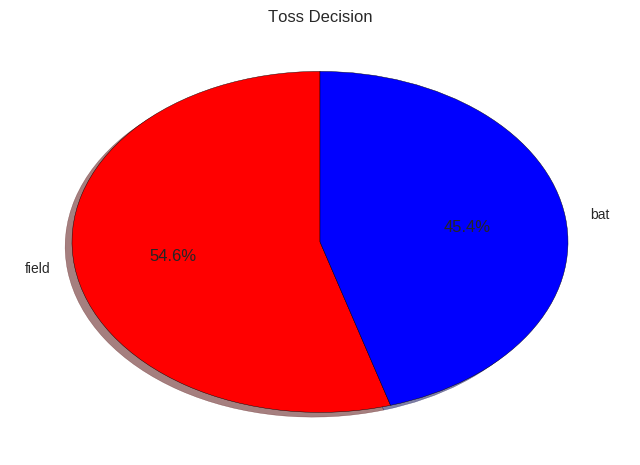

In [30]:
#Toss decisions
fields=per_match[per_match['toss_decision']=='field'].shape[0]
bat=per_match[per_match['toss_decision']=='bat'].shape[0]
plt.pie([fields,bat],labels=['field','bat'],colors=['red','blue'],shadow=True,startangle=90,autopct='%1.1f%%')
plt.title('Toss Decision')
plt.show()

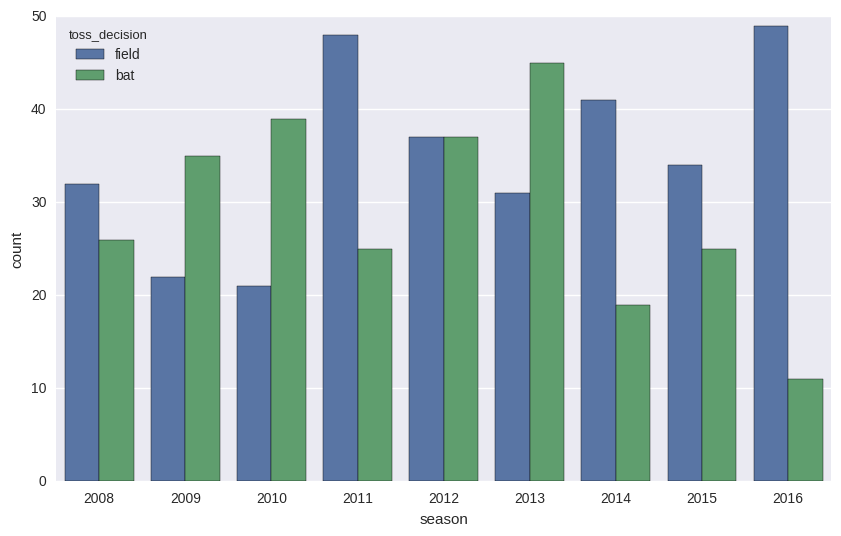

In [31]:
#toss by season 2012 is quite intresting
plt.figure(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=per_match)
plt.show()

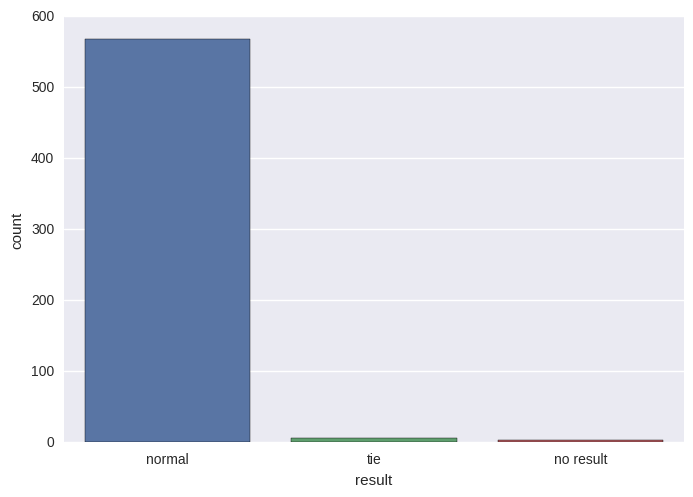

In [32]:
sns.countplot(x='result',data=per_match)
plt.show()

In [33]:
per_match=pd.read_csv('matches.csv')
cut_data=pd.cut(per_match['win_by_runs'],np.arange(0,150,5))
per_match['win_by_runs']=cut_data

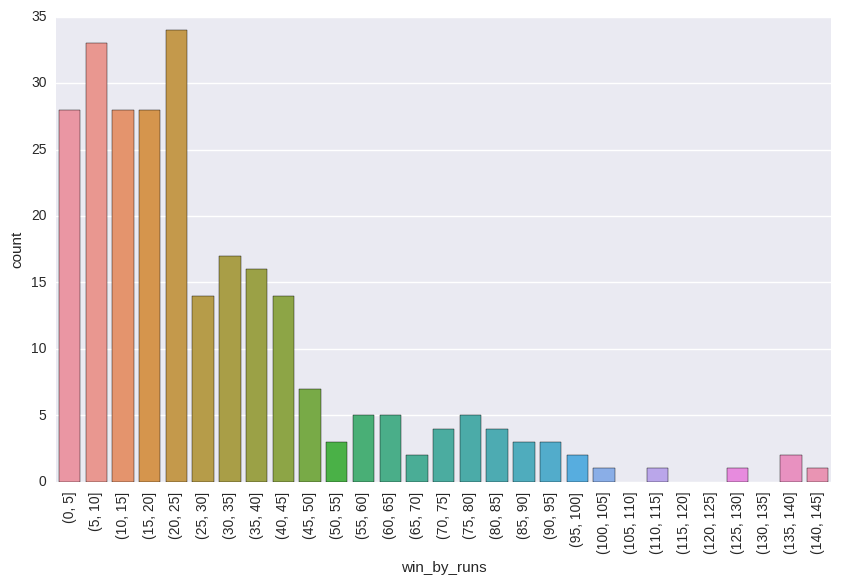

In [34]:
#wins by runs
plt.figure(figsize=(10,6))
sns.countplot(x='win_by_runs',data=per_match)
plt.xticks(rotation='vertical')
plt.show()

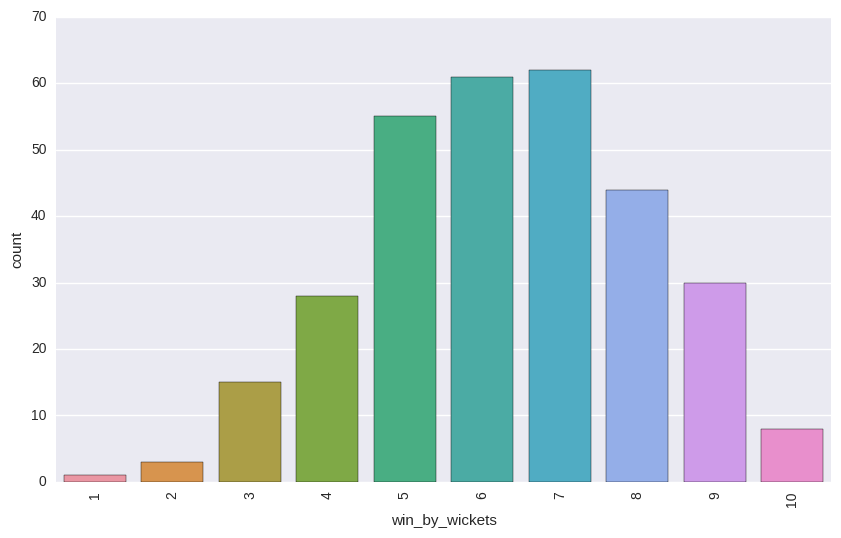

In [35]:
#wins by wickets 
plt.figure(figsize=(10,6))
sns.countplot(x='win_by_wickets',data=per_match[per_match['win_by_wickets']!=0])
plt.xticks(rotation='vertical')
plt.show()

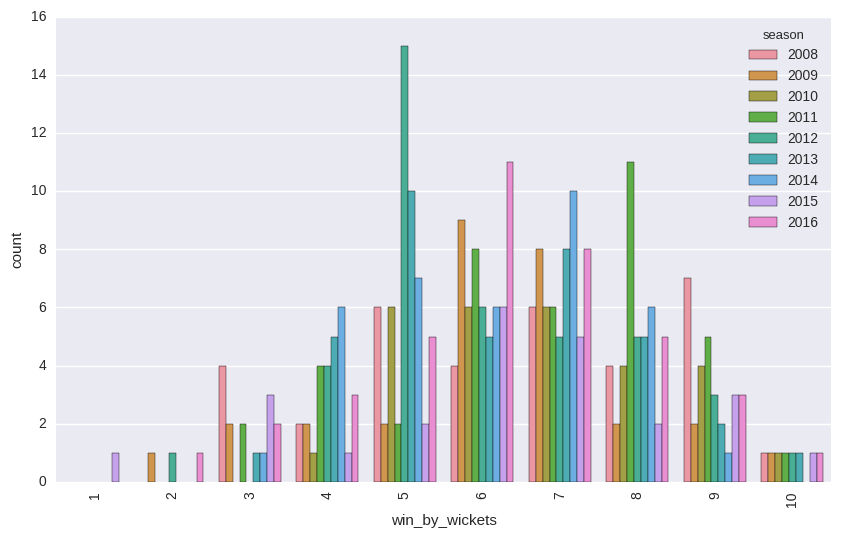

In [36]:
#wins by wickets by season
plt.figure(figsize=(10,6))
sns.countplot(x='win_by_wickets',hue='season',data=per_match[per_match['win_by_wickets']!=0])
plt.xticks(rotation='vertical')
plt.show()

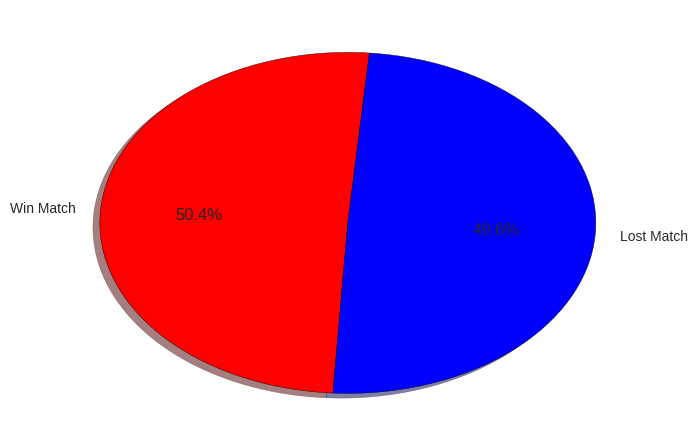

In [37]:
# percent match and toss both are won
x=per_match[per_match['toss_winner']==per_match['winner']].shape[0]
y=per_match.shape[0]-x
plt.pie([x,y],labels=['Win Match','Lost Match'],shadow=True,autopct='%1.1f%%',startangle=85,colors=['red','blue'])
plt.show()

In [86]:
# Player of match award
pom_data={}
for player in np.unique(per_match['player_of_match']):
    temp_data=per_match[per_match['player_of_match']==player]
    pom_data[player]=temp_data.shape[0]

for i in range(10):    
    x=None
    y=0
    for player in pom_data:
        if pom_data[player]>y:
            y=pom_data[player]
            x=player
    del pom_data[x]
    print x,y

CH Gayle 17
YK Pathan 16
AB de Villiers 15
DA Warner 14
RG Sharma 13
SK Raina 13
MEK Hussey 12
MS Dhoni 12
G Gambhir 12
AM Rahane 12


In [87]:
per_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


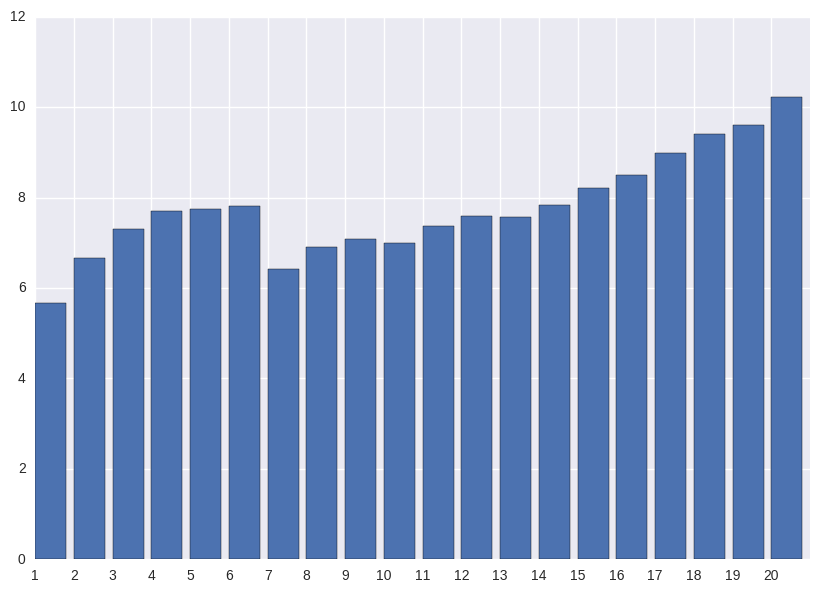

In [112]:
# average run score per over Clearly last 5 play important role
delivery_data=pd.read_csv('deliveries.csv')
delivery_data.fillna('0',inplace=True)
temp_data=delivery_data.copy()
temp_data['ball']=[1]*delivery_data.shape[0]
x=temp_data.groupby('over').sum()
y=[]
for i in range(0,20):
    y.append(float(x.iloc[i]['total_runs'])/x.iloc[i]['ball']*6)
plt.figure(figsize=(10,7))
plt.bar(np.arange(0,20,1),y)
plt.xticks(np.arange(0,20,1),np.arange(1,21,1))
plt.show()

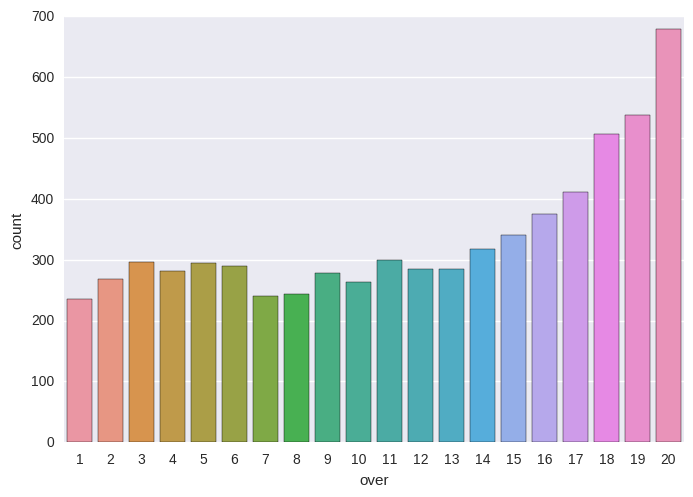

In [114]:
#wickets falls 
sns.countplot(x='over',data=delivery_data[delivery_data['player_dismissed']!='0'])
plt.show()

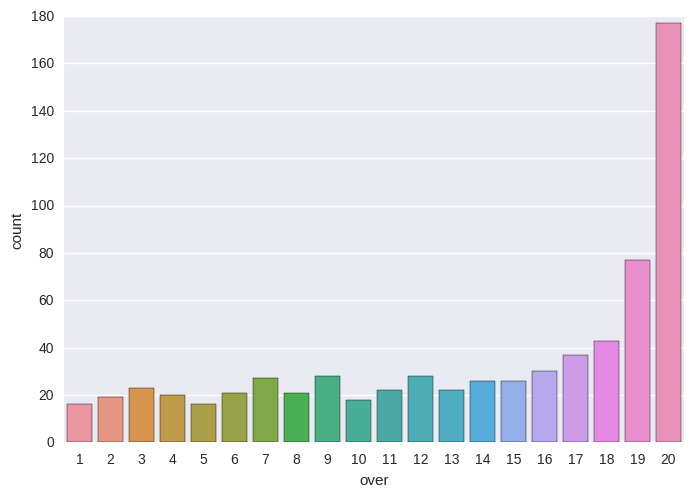

In [117]:
#runout 
sns.countplot(x='over',data=delivery_data[delivery_data['dismissal_kind']=='run out'])
plt.show()

In [118]:
per_match.head(6)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
5,6,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
